In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [2]:
import sys
#sys.path.append('/content/gdrive/mypythondirectory')

sys.path.append('/content/drive/My Drive/Msc. Project Files/BoundCNN/')


In [ ]:
import numpy as np
import matplotlib.pyplot as pyplot
import pandas as pd
import sklearn



import keras
from keras import layers
from keras import regularizers
from keras.models import Sequential, Model

from keras.layers import Dense, Activation, Dropout, Flatten, Input, Embedding, LSTM
from keras.optimizers import SGD, Adam
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard, ModelCheckpoint, LearningRateScheduler
import time




#from time import time
#from tensorflow.python.keras.callbacks import TensorBoard
#from keras.callbacks import TensorBoard

import Quipu
from Quipu.kerasHelpers import resetHistory, nextEpochNo
from Quipu.tools import normaliseLength
from Quipu import augment


from tensorflow.python.client import device_lib
import tensorflow as tf
tf.test.gpu_device_name()
print(device_lib.list_local_devices())


In [50]:
from scipy.io import loadmat

x1 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/1-translocsimu-tsr_m=0.01-Unbound_1.mat')
x2 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/2-translocsimu-tsr_m=0.01-Unbound_1.mat')
x3 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/3-translocsimu-tsr_m=0.01-Unbound_1.mat')
x4 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/4-translocsimu-tsr_m=0.01-Unbound_1.mat')
x5 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/5-translocsimu-tsr_m=0.01-Unbound_1.mat')
x6 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/6-translocsimu-tsr_m=0.01-Unbound_1.mat')
x7 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/7-translocsimu-tsr_m=0.01-Unbound_1.mat')
x8 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/8-translocsimu-tsr_m=0.01-Unbound_1.mat')
x9 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/9-translocsimu-tsr_m=0.01-Unbound_1.mat')
x10 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/10-translocsimu-tsr_m=0.01-Unbound_1.mat')


y1 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/1-translocsimu-tsr_m=0.07-Bound_1.mat')
y2 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/2-translocsimu-tsr_m=0.07-Bound_1.mat')
y3 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/3-translocsimu-tsr_m=0.07-Bound_1.mat')
y4 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/4-translocsimu-tsr_m=0.07-Bound_1.mat')
y5 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/5-translocsimu-tsr_m=0.07-Bound_1.mat')
y6 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/6-translocsimu-tsr_m=0.07-Bound_1.mat')
y7 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/7-translocsimu-tsr_m=0.07-Bound_1.mat')
y8 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/8-translocsimu-tsr_m=0.07-Bound_1.mat')
y9 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/9-translocsimu-tsr_m=0.07-Bound_1.mat')
y10 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/10-translocsimu-tsr_m=0.07-Bound_1.mat')


In [51]:
ch2_Unbound1 = x1['ch2']
ch2_Unbound2 = x2['ch2']
ch2_Unbound3 = x3['ch2']
ch2_Unbound4 = x4['ch2']
ch2_Unbound5 = x5['ch2']
ch2_Unbound6 = x6['ch2']
ch2_Unbound7 = x7['ch2']
ch2_Unbound8 = x8['ch2']
ch2_Unbound9 = x9['ch2']
ch2_Unbound10 = x10['ch2']

ch2_Bound1 = y1['ch2']
ch2_Bound2 = y2['ch2']
ch2_Bound3 = y3['ch2']
ch2_Bound4 = y4['ch2']
ch2_Bound5 = y5['ch2']
ch2_Bound6 = y6['ch2']
ch2_Bound7 = y7['ch2']
ch2_Bound8 = y8['ch2']
ch2_Bound9 = y9['ch2']
ch2_Bound10 = y10['ch2']


In [52]:
ch2_Unbound = np.concatenate((ch2_Unbound1, ch2_Unbound2, ch2_Unbound3, ch2_Unbound4, ch2_Unbound5, ch2_Unbound6, ch2_Unbound7, ch2_Unbound8, ch2_Unbound9, ch2_Unbound10), axis=0)

In [53]:
ch2_Bound = np.concatenate((ch2_Bound1, ch2_Bound2, ch2_Bound3, ch2_Bound4, ch2_Bound5, ch2_Bound6, ch2_Bound7, ch2_Bound8, ch2_Bound9, ch2_Bound10), axis=0)

In [54]:
print(len(ch2_Unbound))
print(len(ch2_Bound))


100000000
100000000


In [55]:
ch2_Bound = ch2_Bound[ch2_Bound[:] > 0.5*pow(10, -10)] 

In [56]:
ch2_Unbound = ch2_Unbound[ch2_Unbound[:] > 0.5*pow(10, -10)] 

In [57]:
# Hyperparameters

hp = {
    "traceLength" : 1100, 
}



In [58]:
print(len(ch2_Bound))
print(len(ch2_Unbound))

990747
991371


In [59]:
ch2_Bound = ch2_Bound[:len(ch2_Bound)-(len(ch2_Bound)%hp["traceLength"])]
ch2_Bound = ch2_Bound.reshape(-1,hp["traceLength"])
ch2_Unbound = ch2_Unbound[:len(ch2_Unbound)-(len(ch2_Unbound)%hp["traceLength"])]
ch2_Unbound = ch2_Unbound.reshape(-1,hp["traceLength"])



In [60]:
TotalDatas = np.concatenate((ch2_Bound, ch2_Unbound), axis=0)

In [61]:
len(TotalDatas)

1801

In [62]:
y_total00 = np.zeros((len(ch2_Unbound),1))   
y_total11 = np.ones((len(ch2_Bound),1))  
y_total10 = np.concatenate((y_total11, y_total00), axis=0)


In [63]:

from sklearn.model_selection import train_test_split
X_train_1, X_test, Y_train_1, Y_test = train_test_split(TotalDatas, y_total10, test_size=0.2) #, random_state=1
X_train, X_val, Y_train, Y_val   = train_test_split(X_train_1, Y_train_1, test_size=0.25) # 0.25 x 0.8 = 0.2




In [64]:
X_train -= np.mean(X_train, axis= 0)
X_train /= np.std(X_train, axis = 0)
X_val -= np.mean(X_val, axis= 0)
X_val /= np.std(X_val, axis = 0)
X_test -= np.mean(X_test, axis= 0)
X_test /= np.std(X_test, axis = 0)

In [65]:
print(len(X_train))
print(len(X_val))
print(len(X_test))
print(len(Y_train))
print(len(Y_val))
print(len(Y_test))

1080
360
361
1080
360
361


In [66]:
Y_train_bound = np.where(Y_train == 0, False, True)
Y_val_bound = np.where(Y_val == 0, False, True)
Y_test_bound = np.where(Y_test == 0, False, True)

In [67]:
# weights

from sklearn.utils import class_weight

labels = np.array([True, False])

weights = class_weight.compute_class_weight('balanced', labels, Y_train_bound.reshape(-1))


pd.DataFrame({
    "Train": pd.Series(Y_train_bound[:,0]).value_counts() ,
    "Dev": pd.Series(Y_val_bound[:,0]).value_counts() ,
    "Test": pd.Series(Y_test_bound[:,0]).value_counts() ,
    "weights": weights
}) 

,Train,Dev,Test,weights
False,544,174,183,1.007463
True,536,186,178,0.992647


In [68]:
#DEFAULT LEARNİNG RATE: 0.001
def define_Log_name(name1):

  #log_dir="logs\\model"+ name1
  log_dir="logs/fit/" + name1
  tensorboard1 = TensorBoard(log_dir, histogram_freq=1, profile_batch = 100000000)# , update_freq="epoch",
  return tensorboard1

In [69]:
from tensorflow.keras import regularizers


def create_model_3():


    input_trace3 = Input(shape=(hp["traceLength"],1), dtype='float32', name='input')



    x3 = Conv1D(64, 5, padding="same")(input_trace3)
    x3 = BatchNormalization(axis=1)(x3)
    x3 = Activation('relu')(x3)
    x3 = Conv1D(64, 5, padding="same")(x3)
    x3 = BatchNormalization(axis=1)(x3) 
    x3 = Activation('relu')(x3)
    x3 = MaxPooling1D(pool_size=3)(x3)
    x3 = Dropout(0.25)(x3)


    #commented out
    x3 = Conv1D(64, 3, padding="same")(x3)
    x3 = BatchNormalization(axis=1)(x3)
    x3 = Activation('relu')(x3)
    x3 = Conv1D(64, 3, padding="same")(x3)
    x3 = BatchNormalization(axis=1)(x3) 
    x3 = Activation('relu')(x3)
    x3 = MaxPooling1D(pool_size=3)(x3)
    x3 = Dropout(0.25)(x3)


    x3 = Flatten()(x3)
    x3 = Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=3e-3, l2=3e-3))(x3)
    x3 = Dropout(0.2)(x3)
    x3 = Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=3e-3, l2=3e-3))(x3)
    x3 = Dropout(0.2)(x3)


    output_bound3 = Dense(1, activation='sigmoid', name='output_barcode')(x3)

    model_3 = Model(inputs=input_trace3, outputs=output_bound3)

    model_3.compile(
        loss = 'binary_crossentropy',
        optimizer = Adam(lr= 9*(10**(-4))),
        metrics = ['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
    )
    return model_3    




In [ ]:
# Main training method
keras.backend.clear_session()

lr = 9*(10**(-4))


model3 = create_model_3()
defineName = "/tsr_m=0.07-2.DNN-Bound-NEW-"
tensorboard = define_Log_name(defineName)



shapeX = (-1, hp["traceLength"],1); 
shapeY = (-1, 1);

early_stopping = keras.callbacks.EarlyStopping(patience=50)


    # data augmentation
X = np.repeat(X_train, 1, axis=0) # make copies
Y = np.repeat(Y_train, 1, axis=0)
Valx = np.repeat(X_val, 1, axis=0) # make copies
Valy = np.repeat(Y_val, 1, axis=0)

for n in range(0,500):
    print("=== Epoch:", n,"===")
    start_time = time.time()

    # Learning rate decay
    #lr = lr*0.98
    #model3.optimizer.lr.assign(lr)
    preparation_time = time.time() - start_time
    
    global out_history
    


    # Fit the model
    out_history = model3.fit( 
        x = X.reshape(shapeX), 
        y = Y.reshape(shapeY), 
        batch_size=32, 
        shuffle = True,
        initial_epoch = n,  
        epochs=n+1,
        #class_weight = weights,
        validation_data=(Valx.reshape(shapeX),  Valy.reshape(shapeY)),
        callbacks = [tensorboard, early_stopping],
        verbose = 1
    )
    training_time = time.time() - start_time - preparation_time
    
    # Feedback 
    print('  prep time: %3.1f sec' % preparation_time, 
          '  train time: %3.1f sec' % training_time)
    print('  loss: %5.3f' % out_history.history['loss'][0] ,
          '  acc: %5.4f' % out_history.history['accuracy'][0] ,
        '  val_accuracy: %5.4f' % out_history.history['val_accuracy'][0],
        '  val_loss: %5.4f' % out_history.history['val_loss'][0] ,
    )





In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs  

In [ ]:
  #model.save("/home/kmisiunas/Documents/Quipu/models/binding_metric971_2018-04-03_no1.h5")

In [ ]:
# Measure evaluation speed
t0 = time.time()
model3.evaluate(x = X_val.reshape(shapeX),   y = Y_val,   verbose=False) 
dt = time.time() - t0
print("Evaluation speed: {:.2f} traces/s ".format(len(X_val) /dt))


Evaluation speed: 1807.65 traces/s 


In [72]:
print("loss:, acc:, precision_acc:, recall_acc:")
print("Train:", model3.evaluate(x = X_train.reshape(shapeX), y = Y_train_bound, verbose = False) )
print("Dev  :", model3.evaluate(x = X_val.reshape(shapeX),   y = Y_val_bound,   verbose = False) )
print("Test :", model3.evaluate(x = X_test.reshape(shapeX),  y = Y_test_bound,  verbose = False) )


loss:, acc:, precision_acc:, recall_acc:
Train: [0.25069743394851685, 0.9962962865829468, 0.9981273412704468, 0.9944030046463013]
Dev  : [0.39770767092704773, 0.9583333134651184, 0.9621621370315552, 0.9569892287254333]
Test : [0.5053476691246033, 0.9390581846237183, 0.9534883499145508, 0.9213483333587646]


In [ ]:
print(out_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1', 'loss', 'accuracy', 'precision_1', 'recall_1'])


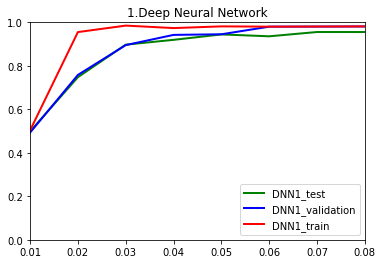

In [77]:
tsr_m = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08]
accuracy_DNN1_train = [0.5032, 0.9553, 0.9851, 0.9737, 0.9815, 0.9803, 0.9808, 0.9815]
accuracy_DNN1_validation = [0.4931, 0.7583, 0.8954, 0.9424, 0.9452, 0.9802, 0.9806, 0.9811]
accuracy_DNN1_test = [0.4986, 0.7479, 0.8975, 0.9196, 0.9445, 0.9359, 0.9556, 0.9555]

lines = pyplot.plot(tsr_m, accuracy_DNN1_test, 'g', tsr_m, accuracy_DNN1_validation, 'b', tsr_m, accuracy_DNN1_train, 'r')

pyplot.setp(lines[0], linewidth=2)
pyplot.setp(lines[1], linewidth=2)
pyplot.setp(lines[2], linewidth=2)
pyplot.legend(('DNN1_test','DNN1_validation','DNN1_train'), loc='lower right')

pyplot.title('1.Deep Neural Network')

axes = pyplot.gca()
axes.set_xlim([0.01, 0.08])
axes.set_ylim([0, 1.00])

pyplot.show()

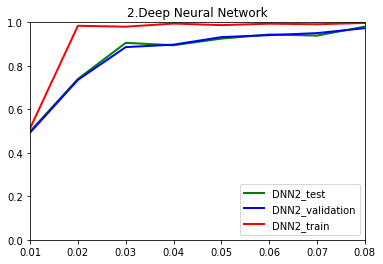

In [81]:
tsr_m = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08]
accuracy_DNN2_train = [0.5125, 0.9843, 0.9801, 0.9944, 0.9873, 0.9938, 0.9913, 0.9972]
accuracy_DNN2_validation = [0.4931, 0.7355, 0.8862, 0.8975, 0.9321, 0.9413, 0.9505, 0.9733]
accuracy_DNN2_test = [0.4986, 0.7396, 0.9058, 0.8947, 0.9252, 0.9442, 0.9390, 0.9805]

lines = pyplot.plot(tsr_m, accuracy_DNN2_test, 'g', tsr_m, accuracy_DNN2_validation, 'b', tsr_m, accuracy_DNN2_train, 'r')

pyplot.setp(lines[0], linewidth=2)
pyplot.setp(lines[1], linewidth=2)
pyplot.setp(lines[2], linewidth=2)
pyplot.legend(('DNN2_test','DNN2_validation','DNN2_train'), loc='lower right')

pyplot.title('2.Deep Neural Network')

axes = pyplot.gca()
axes.set_xlim([0.01, 0.08])
axes.set_ylim([0, 1.00])

pyplot.show()